In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

% matplotlib inline

In [17]:
#fname = "210701//210701_Bi2Te3_p11_2mm_temp_coeff_test_1.txt"
fname = "210622//210622_Bi2Te3_p11_temp_coeff_test_1.txt"
df = pd.read_csv(fname, sep = ",", header = 0)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Time'] = df['Date_Time'] - df['Date_Time'][0]
#Rref = 3 #ohms
df.head()

,Date_Time,RTDl,RTDr,Rsamp,Time
0,2021-06-22 11:58:48.625225,1097.68528,1098.61472,18.468665,0 days 00:00:00
1,2021-06-22 11:58:48.804235,1097.68277,1098.61475,18.468673,0 days 00:00:00.179010
2,2021-06-22 11:58:49.152255,1097.68122,1098.61513,18.468977,0 days 00:00:00.527030
3,2021-06-22 11:58:49.338266,1097.68248,1098.61476,18.468643,0 days 00:00:00.713041
4,2021-06-22 11:58:49.511275,1097.68354,1098.61472,18.468391,0 days 00:00:00.886050


In [18]:
df['Tl'] = 9.91684E-6 * df['RTDl']**2 + 0.23605 * df['RTDl'] - 245.96823
df['Tr'] = 9.91684E-6 * df['RTDr']**2 + 0.23605 * df['RTDr'] - 245.96823
df['Tavg'] = (df['Tl'] + df['Tr']) / 2

C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


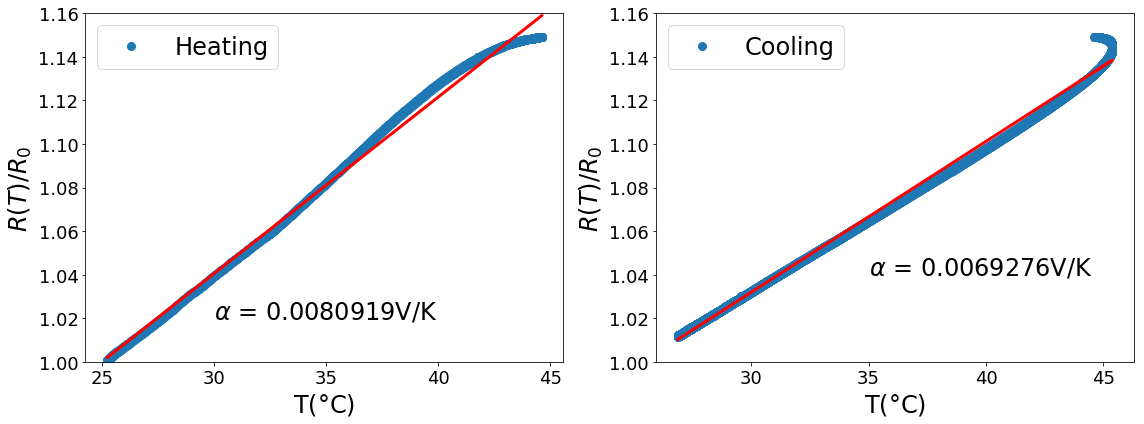

In [20]:
df['Tl'] = 9.91684E-6 * df['RTDl']**2 + 0.23605 * df['RTDl'] - 245.96823
df['Tr'] = 9.91684E-6 * df['RTDr']**2 + 0.23605 * df['RTDr'] - 245.96823
df['Tavg'] = (df['Tl'] + df['Tr']) / 2
#df['Rsamp'] = df['Vsamp'] / df['Vref'] * Rref

fig, axs = plt.subplots(1,2, figsize = (16,6))
fz = 24 #fontsize
ylim = [1, 1.16]
mask = df['Rsamp'].idxmax()
#heating
x = df['Tavg'][0 : mask]
y = df['Rsamp'][0 : mask]/ df['Rsamp'].iloc[0]
m1, b1 = np.polyfit(x, y, 1)
axs[0].plot(df['Tavg'][0 : mask], y, marker = 'o', markersize = 8, ls = " ", label = 'Heating')
axs[0].plot(df['Tavg'][0 : mask], np.polyval([m1,b1], x), color = 'red', linewidth = 3)
axs[0].text(30, 1.02, rf'$\alpha$ = {round(m1,7)}V/K', fontsize = fz)
axs[0].set_xlabel(r'T($\degree$C)', fontsize = fz)
axs[0].set_ylabel(r'$R(T) / R_0$', fontsize = fz)
axs[0].set_ylim(ylim)
axs[0].legend(fontsize = fz)
axs[0].tick_params(labelsize=18)

# mask = np.where(df['Tavg'] > 37.9 & df['Tavg'] < 38.0)
#mask = 10720
#cooling
x = df['Tavg'][mask:]
y = df['Rsamp'][mask:]/ df['Rsamp'].iloc[0]
m2, b2 = np.polyfit(x, y, 1)
axs[1].plot(df['Tavg'][mask:], y, marker = 'o', markersize = 8, ls = " ", label = 'Cooling')
axs[1].plot(df['Tavg'][mask:], np.polyval([m2,b2], x), color = 'red', linewidth = 3)
axs[1].text(35, 1.04, rf'$\alpha$ = {round(m2,7)}V/K', fontsize = fz)
axs[1].set_xlabel(r'T($\degree$C)', fontsize = fz)
axs[1].set_ylabel(r'$R(T) / R_0$', fontsize = fz)
axs[1].legend(fontsize = fz)
axs[1].tick_params(labelsize=18)
axs[1].set_ylim(ylim)
plt.tight_layout()

#fig.savefig(fname[:-4] + "_analysis.jpg", dpi = 100)

C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\xueti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


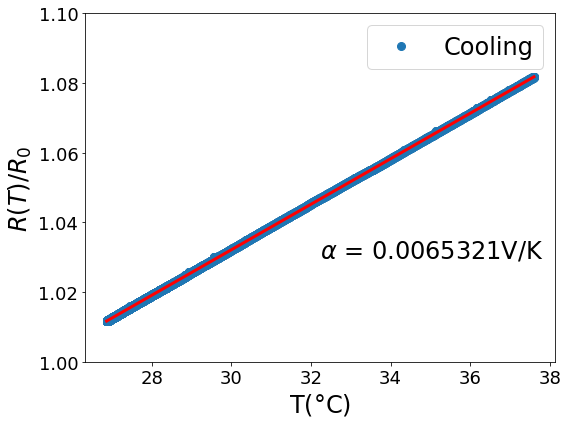

In [23]:
#cooling only
fig, axs = plt.subplots(1,1, figsize = (8,6))
fz = 24 #fontsize
ylim = [1, 1.1]
# mask = np.where(df['Tavg'] > 37.9 & df['Tavg'] < 38.0)
mask = 13434
#cooling
x = df['Tavg'][mask:]
y = df['Rsamp'][mask:]/ df['Rsamp'].iloc[0]
m2, b2 = np.polyfit(x, y, 1)
axs.plot(df['Tavg'][mask:], y, marker = 'o', markersize = 8, ls = " ", label = 'Cooling')
axs.plot(df['Tavg'][mask:], np.polyval([m2,b2], x), color = 'red', linewidth = 3)
axs.text(0.5, 0.3, rf'$\alpha$ = {round(m2,7)}V/K', transform = axs.transAxes, fontsize = fz)
axs.set_xlabel(r'T($\degree$C)', fontsize = fz)
axs.set_ylabel(r'$R(T) / R_0$', fontsize = fz)
axs.legend(fontsize = fz)
axs.tick_params(labelsize=18)
axs.set_ylim(ylim)
plt.tight_layout()

fig.savefig(fname[:-4] + "_cooling_analysis.jpg", dpi = 100)

In [21]:
mask = np.where((df['Tavg'] > 37.5) & (df['Tavg'] < 37.6))
mask

(array([ 1752,  1753,  1754,  1755,  1756,  1757,  1758,  1759,  1760,
         1761,  1762,  1763,  1764,  1765,  1766,  1767,  1768, 13434,
        13435, 13436, 13437, 13438, 13439, 13440, 13441, 13442, 13443,
        13444, 13445, 13446, 13447, 13448, 13449, 13450, 13451, 13452,
        13453, 13454, 13455, 13456, 13457, 13458, 13459, 13460, 13461,
        13462, 13463, 13464, 13465, 13466, 13467, 13468, 13469, 13470,
        13471, 13472, 13473, 13474, 13475, 13476, 13477, 13478, 13479,
        13480, 13481, 13482, 13483, 13484, 13485, 13486, 13487, 13488,
        13489, 13490, 13491, 13492, 13493, 13494, 13495, 13496, 13497,
        13498, 13499, 13500, 13501, 13502, 13503, 13504, 13505, 13506,
        13507, 13508, 13509, 13510, 13511, 13512, 13513, 13514, 13515,
        13516, 13517, 13518, 13519, 13520, 13521, 13522], dtype=int64),)

In [10]:
for i in range(1, len(mask[0]), 1):
    if (mask[0][i] - mask[0][i - 1]) > 10:
        print(mask[0][i])
        break

3446


1
